In [38]:
import pandas as pd
from zipfile import ZipFile
import seaborn as sns 
import matplotlib.pyplot as plt

In [39]:
ZipFile("pd_nibrs_datasd.csv.zip").extractall()

In [40]:
df = pd.read_csv('pd_nibrs_datasd.csv', low_memory=False)

In [41]:
crimes_df = df.get(['case_number', 'occured_on', 'pd_offense_category', 'neighborhood', 'division', 'city', 'latitude', 'longitude'])

In [42]:
crimes_df = crimes_df[crimes_df['pd_offense_category'] != 'All Other Offenses']

In [43]:
crimes_df.head()

,case_number,occured_on,pd_offense_category,neighborhood,division,city,latitude,longitude
1,22701933,2022-02-11 22:00:00,Theft From Motor Vehicle,Mira Mesa,Northeastern,SAN DIEGO,32.901073,-117.120120
2,21020993,2021-05-02 06:00:00,Simple Assault,Midway District,Western,SAN DIEGO,32.754899,-117.206022
3,22041849,2022-09-21 12:46:21,Aggravated Assault,Unknown,Unknown,Mecca,NaN,NaN
4,21001415,2021-01-09 11:23:00,Stolen Property Offenses,Egger Highlands,Southern,CHULA VISTA,32.605965,-117.088752
5,23009256,2023-03-04 01:04:00,Motor Vehicle Theft,Rolando,Mid-City,SAN DIEGO,32.759579,-117.055797


In [44]:
neighborhood_df = crimes_df.groupby('neighborhood').count().sort_values(by='case_number', ascending=False).rename(columns={'case_number':'Number of Crimes'})[0:5]

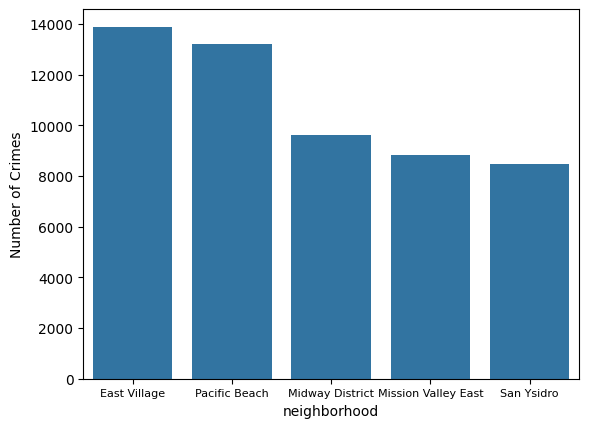

In [45]:
sns.barplot(data = neighborhood_df, x = neighborhood_df.index, y = 'Number of Crimes')
plt.xticks(fontsize=8) 
plt.show()

In [46]:
def get_hour(time):
    return int(time[11:13])

crimes_df['hour of day'] = crimes_df['occured_on'].apply(get_hour)
crimes_df

,case_number,occured_on,pd_offense_category,neighborhood,division,city,latitude,longitude,hour of day
1,22701933,2022-02-11 22:00:00,Theft From Motor Vehicle,Mira Mesa,Northeastern,SAN DIEGO,32.901073,-117.120120,22
2,21020993,2021-05-02 06:00:00,Simple Assault,Midway District,Western,SAN DIEGO,32.754899,-117.206022,6
3,22041849,2022-09-21 12:46:21,Aggravated Assault,Unknown,Unknown,Mecca,NaN,NaN,12
4,21001415,2021-01-09 11:23:00,Stolen Property Offenses,Egger Highlands,Southern,CHULA VISTA,32.605965,-117.088752,11
5,23009256,2023-03-04 01:04:00,Motor Vehicle Theft,Rolando,Mid-City,SAN DIEGO,32.759579,-117.055797,1
...,...,...,...,...,...,...,...,...,...
374919,24028618,2024-07-16 22:41:00,Simple Assault,Clairemont Mesa East,Northern,SAN DIEGO,32.807919,-117.155716,22
374920,24710109,2024-07-16 18:59:00,Larceny,Tierra Santa,Eastern,SAN DIEGO,32.823143,-117.100936,18
374921,24028620,2024-07-17 00:05:00,Aggravated Assault,Midway District,Western,SAN DIEGO,32.754379,-117.215426,0
374927,24028628,2024-07-17 01:35:49,Alcohol Violations,Park West,Central,SAN DIEGO,32.727190,-117.164823,1


In [47]:
time_df = crimes_df.groupby('hour of day').count()

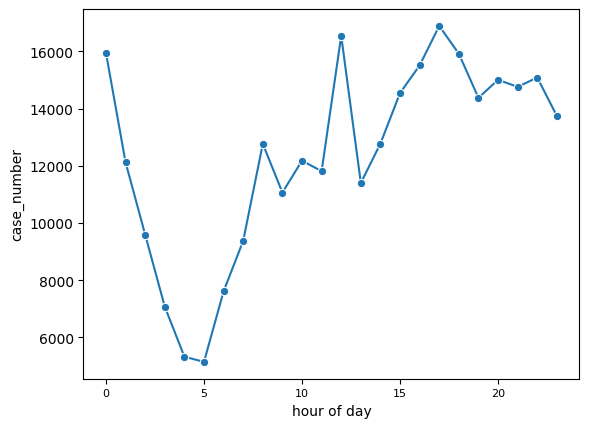

In [48]:
sns.lineplot(data = time_df, x = time_df.index, y = 'case_number', marker='o')
plt.xticks(fontsize=8) 
plt.show()